# LDF

The output from the stand-alone LDF configuration is in the link below


Note that LDF is currently run by users. Temporarily, we suggest users walk through the following process:
1) Install LDF and activate cupid-analysis
2) Use the `CUPiD/helper_scripts/generate_ldf_config_file.py` script to generate a LDF config file based on a CUPiD configuration file.
   * `cd CUPiD/examples/external_diag_packages`
   * `../../helper_scripts/generate_ldf_config_file.py --cupid-config-loc . --ldf-template ../../externals/LDF/config_clm_unstructured_plots.yaml --out-file LDF_config.yaml`
2) Run LDF with the newly created configuration file.
   * `../../externals/LDF/run_adf_diag LDF_config.yaml`

In [1]:
import os

from IPython.core.display import HTML, Image
from IPython.display import display
import pandas as pd

In [2]:
ldf_root = "."
case_name = None
base_case_name = None
start_date = ""
end_date = ""
base_start_date = None
base_end_date = None
key_plots = None
# ldf_root will be external_diag_packages/computed_notebooks/LDF/

In [3]:
# Parameters
case_name = "ctsm5.4.004_bgc_f09_131_HIST"
base_case_name = "ctsm5.4.CMIP7_ciso_ctsm5.3.075_f09_124_HIST"
case_nickname = "131_HIST"
base_case_nickname = "124_HIST"
CESM_output_dir = "/glade/derecho/scratch/wwieder/archive"
start_date = "2000-01-01"
end_date = "2005-01-01"
climo_start_year = 2000
climo_end_year = 2004
base_start_date = "2000-01-01"
base_end_date = "2005-01-01"
base_climo_start_year = 2000
base_climo_end_year = 2004
obs_data_dir = (
    "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CUPiD_obs_data"
)
ts_dir = None
lc_kwargs = {"threads_per_worker": 1}
serial = False
ldf_root = "../../examples/land_only/LDF_output/"
key_plots = [
    "GPP_ANN_LatLon_Mean.png",
    "ELAI_ANN_LatLon_Mean.png",
    "RegionalClimo_Amazonia_RegionalClimo_Mean.png",
]
subset_kwargs = {}
product = (
    "/glade/work/wwieder/CUPiD/examples/land_only/computed_notebooks//lnd/LDF.ipynb"
)


In [4]:
# Want some base case parameter defaults to equal control case values
if base_case_name is not None:
    if base_start_date is None:
        base_start_date = start_date

    if base_end_date is None:
        base_end_date = end_date

# convert start-date and end-date to year range
case_year_range = [int(start_date.split("-")[0]), int(end_date.split("-")[0])]

if (not base_start_date) and (not base_end_date):
    base_case_year_range = None
else:
    base_case_year_range = [
        int(base_start_date.split("-")[0]),
        int(base_end_date.split("-")[0]),
    ]

In [5]:
if base_case_year_range:
    base_case_yr_range_str = f"_{base_case_year_range[0]}_{base_case_year_range[1]}"
    alt_base_case_yr_range_str = (
        f"_{base_case_year_range[0]}_{str(int(base_case_year_range[1])-1)}"
    )
else:
    base_case_yr_range_str = ""
    alt_base_case_yr_range_str = ""


possible_ldf_comparison_names = [
    f"{case_name}_{case_year_range[0]}_{case_year_range[1]}_vs_{base_case_name}{base_case_yr_range_str}"
]
possible_ldf_comparison_names.append(
    f"{case_name}_{case_year_range[0]}_{str(int(case_year_range[1])-1)}_vs_{base_case_name}{base_case_yr_range_str}"
)
possible_ldf_comparison_names.append(
    f"{case_name}_{case_year_range[0]}_{str(int(case_year_range[1])-1)}_vs_{base_case_name}{alt_base_case_yr_range_str}"
)
possible_ldf_comparison_names.append(
    f"{case_name}_{case_year_range[0]}_{case_year_range[1]}_vs_{base_case_name}{alt_base_case_yr_range_str}"
)

In [6]:
ldf_found = False
for ldf_comparison_name in possible_ldf_comparison_names:
    ldf_root_candidate = os.path.join(ldf_root, ldf_comparison_name)
    if os.path.exists(ldf_root_candidate):
        ldf_found = True
        ldf_root = ldf_root_candidate
        display(
            HTML(
                f'<a href="../LDF/{ldf_comparison_name}/website/index.html" target="_blank" style="font-size: 30px">Full LDF output</a>'
            )
        )
        break

if not ldf_found:
    print("No LDF output found for the specified case and date range.")

## Key Metrics from LDF

Some important things to look at from LDF include a comparison table and a few maps:

In [7]:
comparison_table = os.path.join(ldf_root, "amwg_table_comp.csv")
if os.path.isfile(comparison_table):
    table = pd.read_csv(comparison_table)
    display(HTML(table.to_html(index=False, float_format="{:6g}".format)))

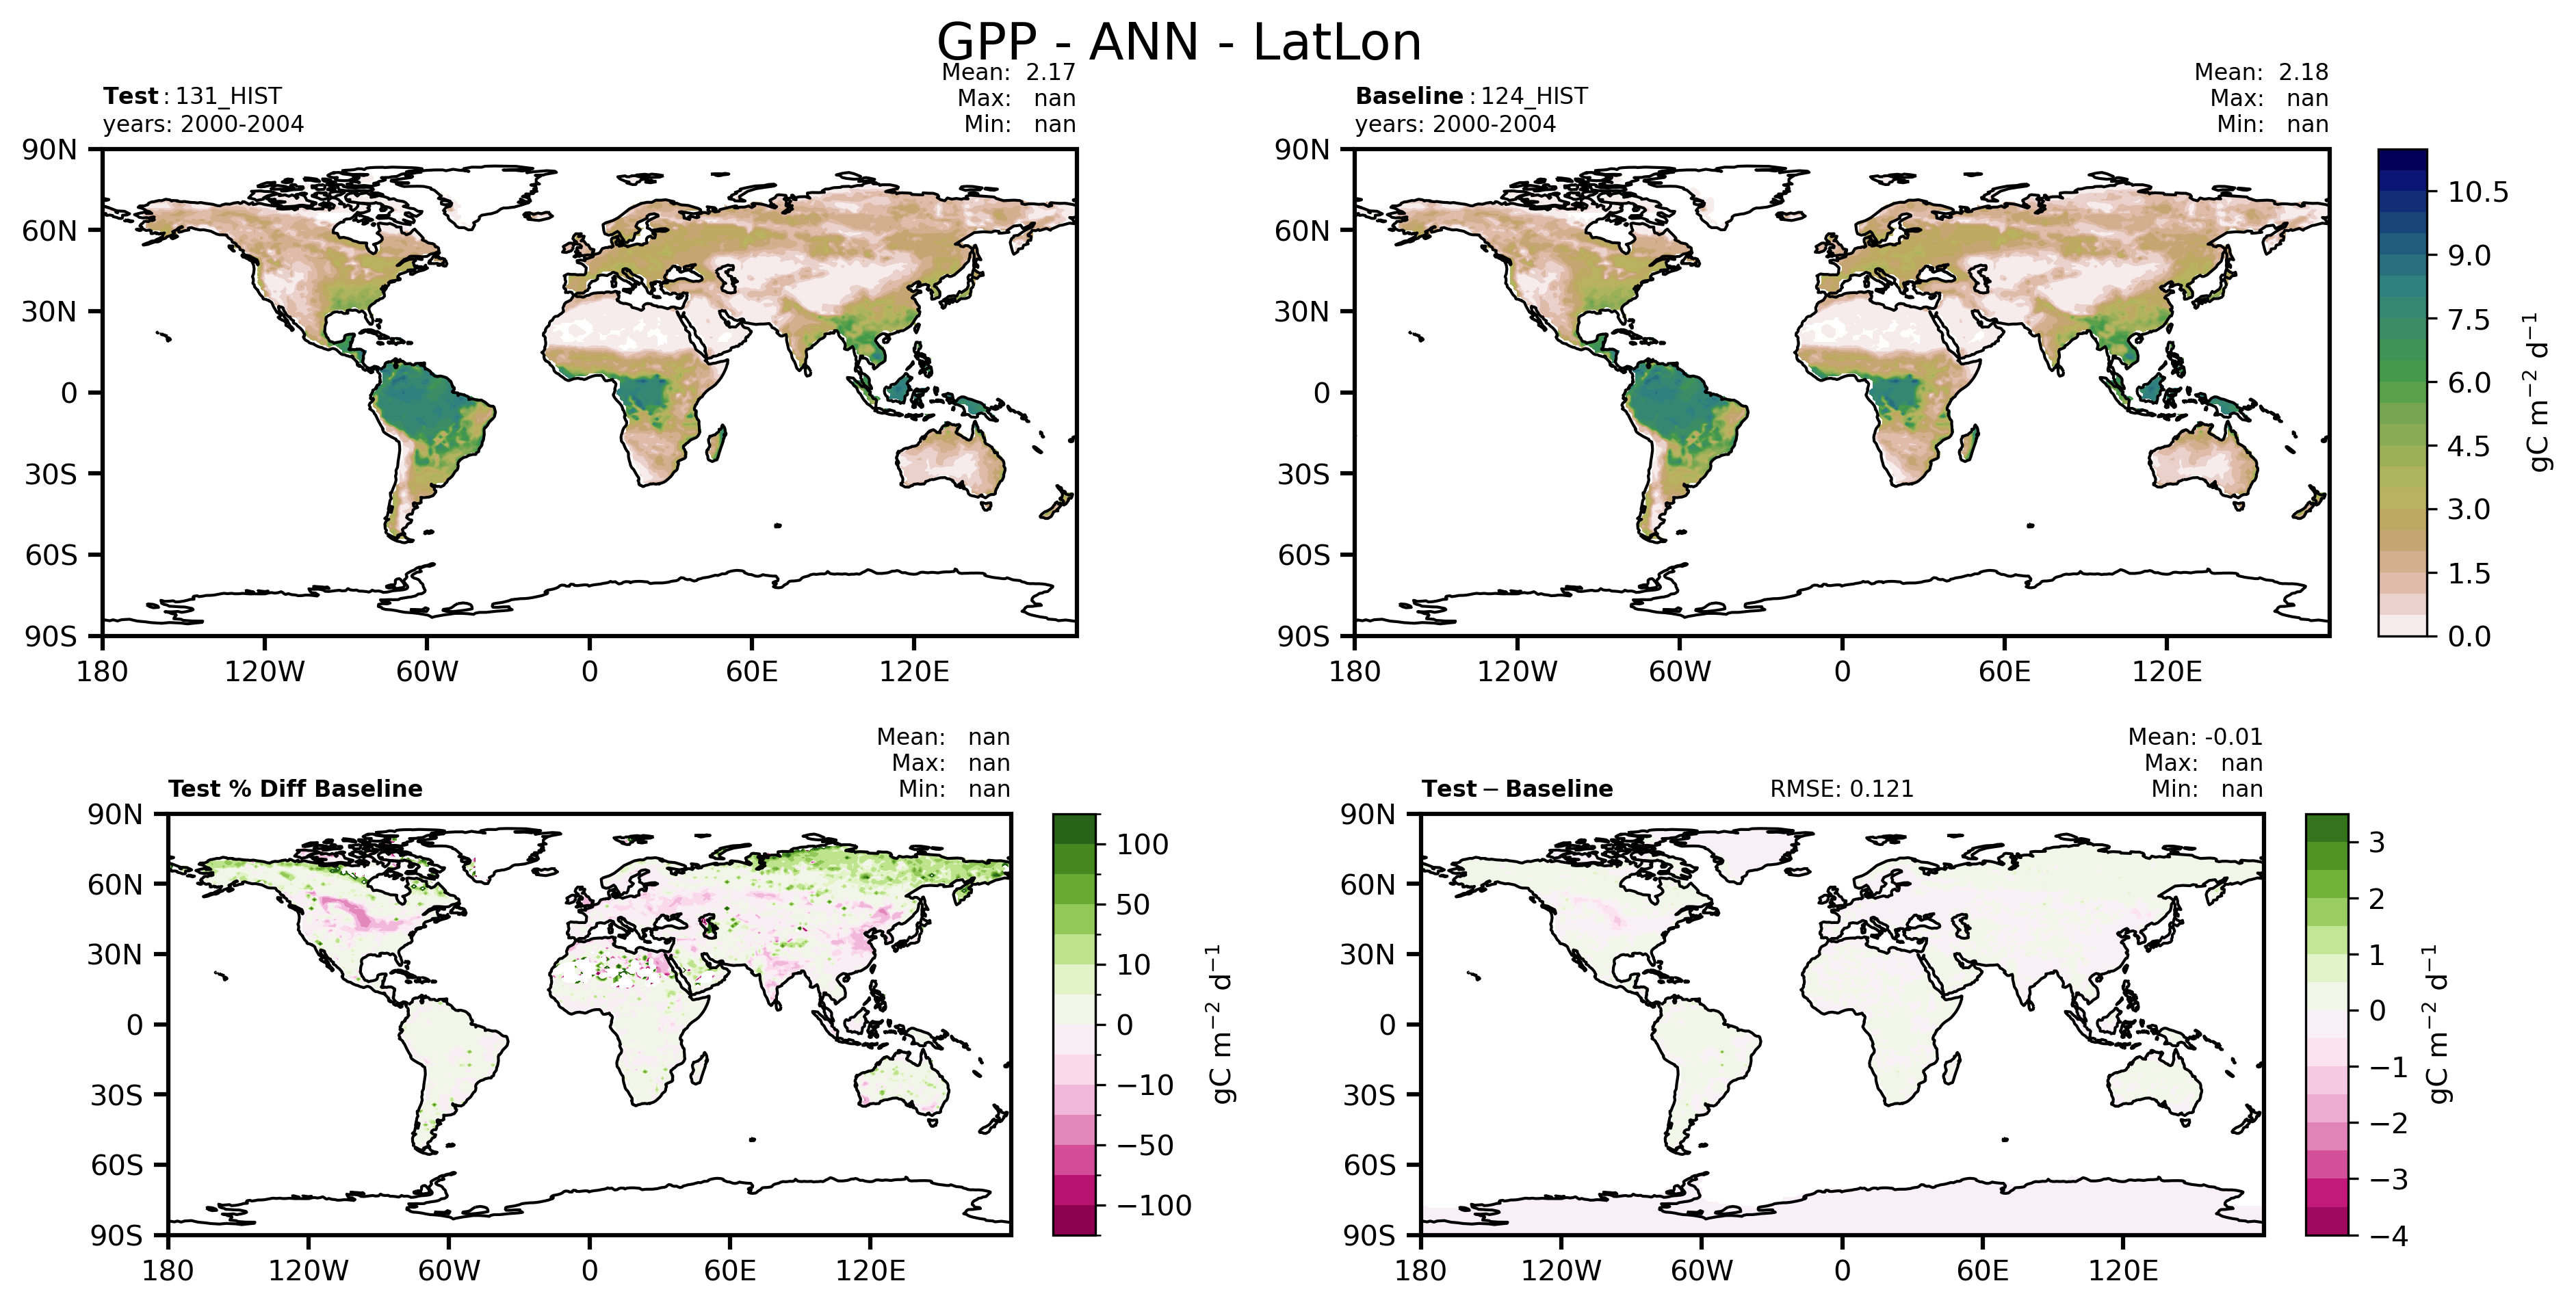

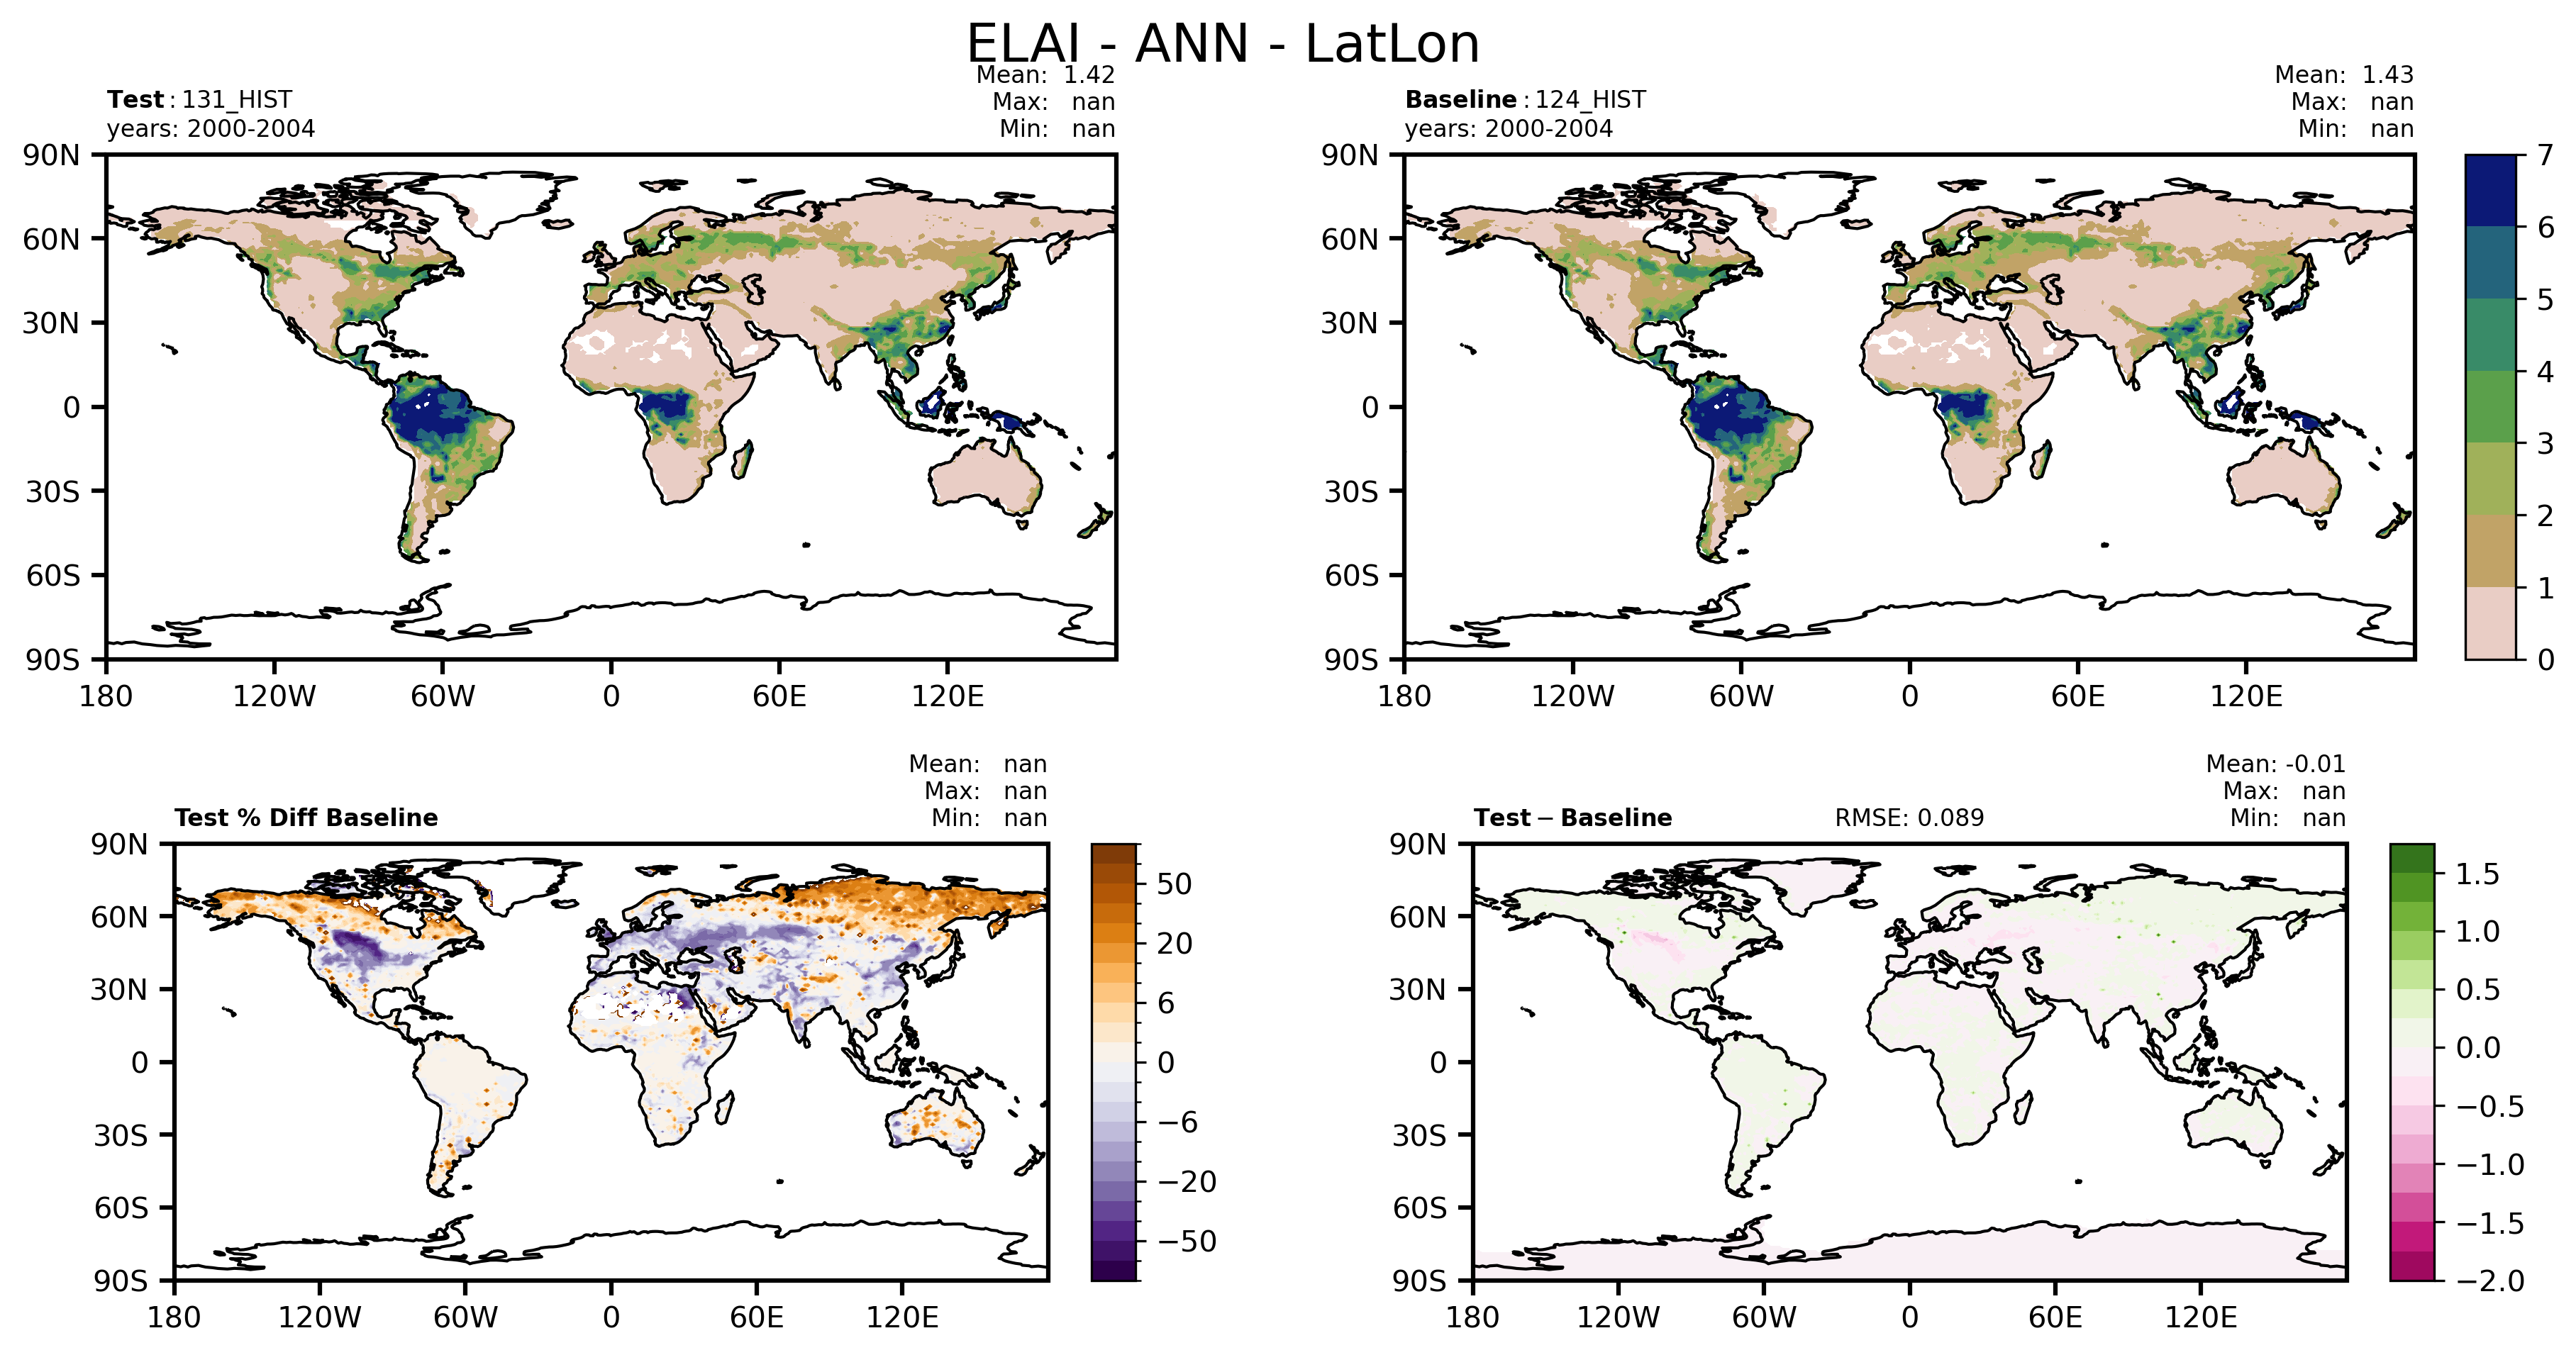

In [8]:
for path_to_key_plot in key_plots:
    full_path = os.path.join(ldf_root, path_to_key_plot)
    if os.path.isfile(full_path):
        display(Image(full_path))